In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import statsmodels.api as sm
from sklearn.datasets import load_diabetes, fetch_california_housing
from sklearn.tree import export_graphviz
import graphviz



# Task 1

In [3]:
diabetes_sklearn = load_diabetes()
df_diabetes = pd.DataFrame(data = diabetes_sklearn.data,
                           columns = diabetes_sklearn.feature_names)
df_diabetes['target'] = diabetes_sklearn.target

### 1 вивести 5 перших рядків

In [38]:
df_diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [39]:
df_diabetes.shape

(442, 11)

### 2. Перевірити наявність пропусків. У разі виявлення замінити на середнє значення

In [40]:
df_diabetes.isna().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

### 3. Перевірити наявність дублікатів, при виявленні – видалити

In [41]:
df_diabetes.duplicated().sum()

0

### 4. Замінити бінарні ознаки. У стовпчику «стать» спочатку перевірте унікальні значення

In [42]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [43]:
df_diabetes.sex.unique()

array([ 0.05068012, -0.04464164])

In [44]:
df_diabetes['sex'] = df_diabetes['sex'].astype(str)
df_diabetes.sex.unique()

array(['0.05068011873981862', '-0.044641636506989144'], dtype=object)

In [45]:
df_diabetes['sex'] = df_diabetes['sex'].map({'0.05068011873981862': 1, '-0.044641636506989144': 0})
df_diabetes.sex.unique()

array([1, 0], dtype=int64)

### 5. Перевірити тип даних. При необхідності замінити тип даних на числовий

In [46]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    int64  
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 38.1 KB


In [47]:
df_diabetes.head(2)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,1,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,0,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0


### 6. Обчислити кореляцію між прогресом діабету і іншмим ознаками. Розташувати в порядку спадання.Побудувати теплову карту кореляції.

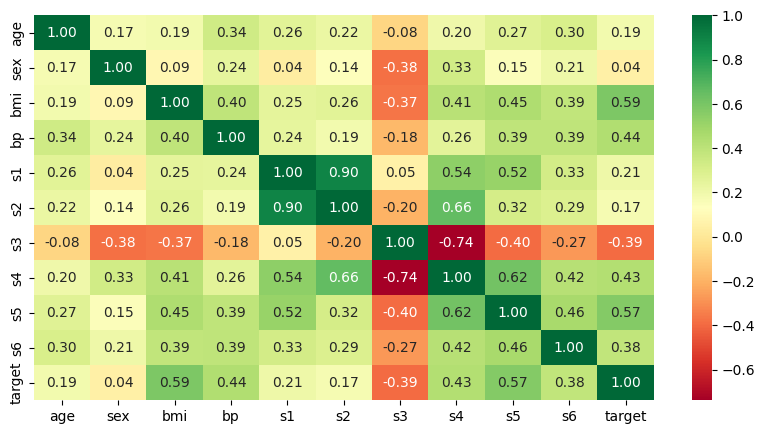

In [48]:
cor_diabetes = df_diabetes.corr()
plt.figure(figsize = (10, 5))
sns.heatmap(data = cor_diabetes, annot = True, cmap = "RdYlGn", cbar = True, fmt='.2f')
plt.show()

In [49]:
highest_correlation = cor_diabetes.unstack().sort_values(ascending = False)
highest_correlation = highest_correlation[highest_correlation < 1].head(5)

print(f"Пари з найвищою кореляцією:\n{highest_correlation}")

Пари з найвищою кореляцією:
s2  s1    0.896663
s1  s2    0.896663
s2  s4    0.659817
s4  s2    0.659817
    s5    0.617859
dtype: float64


In [50]:
print(f"Найбільше зі змінною target корелюють bmi, s5. \n{cor_diabetes['target'].sort_values()}")

Найбільше зі змінною target корелюють bmi, s5. 
s3       -0.394789
sex       0.043062
s2        0.174054
age       0.187889
s1        0.212022
s6        0.382483
s4        0.430453
bp        0.441482
s5        0.565883
bmi       0.586450
target    1.000000
Name: target, dtype: float64


### 7. Поділити дані на тренувальну і тестову вибірки

In [51]:
X_train, X_test, y_train, y_test = train_test_split(df_diabetes.drop(columns = ['target']), df_diabetes['target'], test_size = 0.2, random_state = 42)

display(X_train.head(), y_train.head())

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
17,0.070769,1,0.012117,0.056301,0.034206,0.049416,-0.039719,0.034309,0.027364,-0.001078
66,-0.009147,1,-0.018062,-0.033213,-0.020832,0.012152,-0.072854,0.071210,0.000272,0.019633
137,0.005383,0,0.049840,0.097615,-0.015328,-0.016345,-0.006584,-0.002592,0.017036,-0.013504
245,-0.027310,0,-0.035307,-0.029770,-0.056607,-0.058620,0.030232,-0.039493,-0.049872,-0.129483
31,-0.023677,0,-0.065486,-0.081413,-0.038720,-0.053610,0.059685,-0.076395,-0.037129,-0.042499


17     144.0
66     150.0
137    280.0
245    125.0
31      59.0
Name: target, dtype: float64

### 8. Масштабувати ознаки

In [52]:
scale = StandardScaler()
X_train_scaled = pd.DataFrame(scale.fit_transform(X_train), columns = X_train.columns)
X_test_scaled  = pd.DataFrame(scale.transform(X_test), columns = X_train.columns)

### 9-10. Побудувати модель лінійной регресії і RandomForest регресії на основі більш корелюючих ознак (підібрати оптимальне число). Вивести коефіцієнт детермінації і середньоквадратичну помилку.

In [53]:
def elinear_regression(y_train, y_test, y_train_pred, y_test_pred):
    train_loss = mean_squared_error(y_train, y_train_pred)
    test_loss  = mean_squared_error(y_test, y_test_pred)

    r2_train = r2_score(y_train, y_train_pred)
    r2_test  = r2_score(y_test, y_test_pred)

    return train_loss, test_loss, r2_train, r2_test


model_lin = LinearRegression().fit(X_train_scaled, y_train)

y_train_pred_lin = model_lin.predict(X_train_scaled)
y_test_pred_lin = model_lin.predict(X_test_scaled)

train_loss_lin, test_loss_lin, r2_train_lin, r2_test_lin = elinear_regression(y_train, y_test, y_train_pred_lin, y_test_pred_lin)

print(f'помилка моделі на тренувальному наборі даних: {round(train_loss_lin, 2)}')
print(f'помилка моделі на тестувальному наборі даних: {round(test_loss_lin, 2)}')
print(f'\nкоеф. детермінації (R²) на тренувальному наборі даних: {round(r2_train_lin, 2)}')
print(f'коеф. детермінації (R²) на тестувальному наборі даних: {round(r2_test_lin, 2)}')

помилка моделі на тренувальному наборі даних: 2868.55
помилка моделі на тестувальному наборі даних: 2900.19

коеф. детермінації (R²) на тренувальному наборі даних: 0.53
коеф. детермінації (R²) на тестувальному наборі даних: 0.45


In [54]:
model_rf = RandomForestRegressor(n_estimators = 100, random_state = 42, n_jobs = -1)
model_rf.fit(X_train_scaled, y_train)

y_train_pred_rf = model_rf.predict(X_train_scaled)
y_test_pred_rf = model_rf.predict(X_test_scaled)

train_loss_rf, test_loss_rf, r2_train_rf, r2_test_rf = elinear_regression(y_train, y_test, y_train_pred_rf, y_test_pred_rf)

print(f'помилка моделі на тренувальному наборі даних: {round(train_loss_rf, 2)}')
print(f'помилка моделі на тестувальному наборі даних: {round(test_loss_rf, 2)}')
print(f'\nкоеф. детермінації (R²) на тренувальному наборі даних: {round(r2_train_rf, 2)}')
print(f'коеф. детермінації (R²) на тестувальному наборі даних: {round(r2_test_rf, 2)}')

помилка моделі на тренувальному наборі даних: 460.29
помилка моделі на тестувальному наборі даних: 2959.18

коеф. детермінації (R²) на тренувальному наборі даних: 0.92
коеф. детермінації (R²) на тестувальному наборі даних: 0.44


### 11. Побудувати графіки

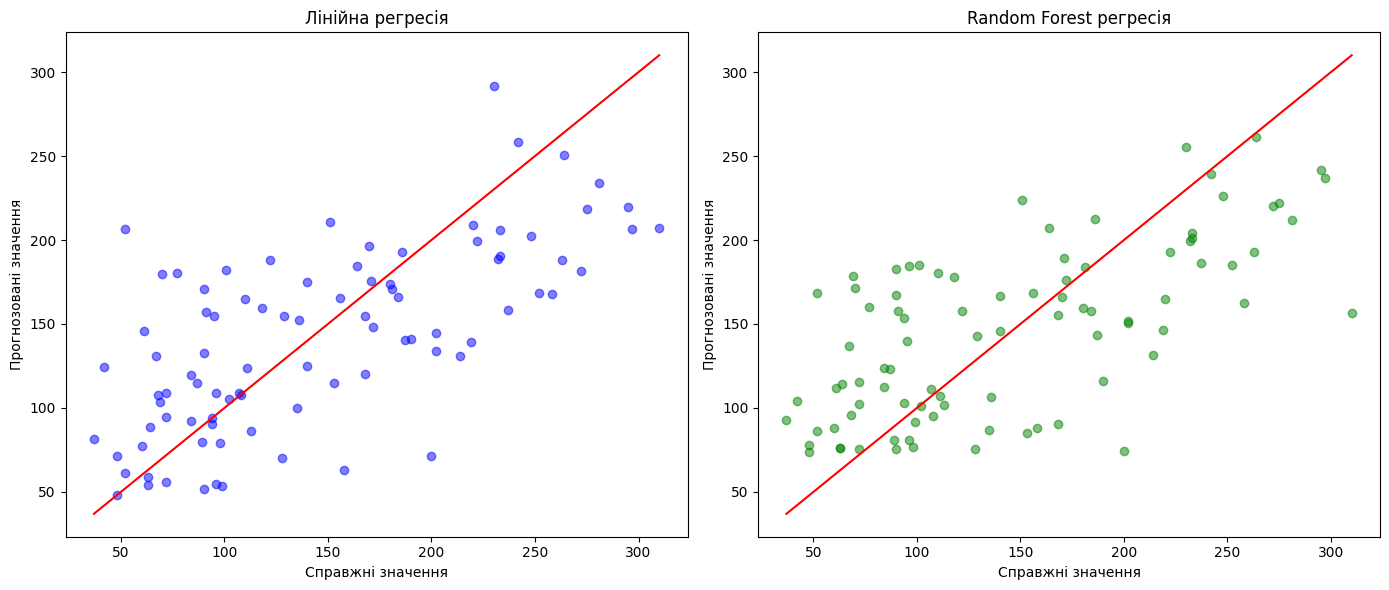

In [55]:
def plt_predictions(y, y_pred_lin, y_pred_rf):
    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(y, y_pred_lin, color = 'blue', alpha=0.5)
    plt.plot([min(y), max(y)], [min(y), max(y)], color = 'red')
    plt.title("Лінійна регресія")
    plt.xlabel("Справжні значення")
    plt.ylabel("Прогнозовані значення")

    plt.subplot(1, 2, 2)
    plt.scatter(y, y_pred_rf, color = 'green', alpha=0.5)
    plt.plot([min(y), max(y)], [min(y), max(y)], color = 'red')
    plt.title("Random Forest регресія")
    plt.xlabel("Справжні значення")
    plt.ylabel("Прогнозовані значення")

    plt.tight_layout()
    plt.show()

plt_predictions(y_test, y_test_pred_lin, y_test_pred_rf)

### 12. Вивести справжні і прогнозовані значення

In [56]:
comparison = pd.DataFrame({'справжні значення': y_test, 
                           'прогнозовані значення (Лін. Регресія)': y_test_pred_lin, 
                           'прогнозовані значення (Random Forest)': y_test_pred_rf})
display(comparison.head(10))

,справжні значення,прогнозовані значення (Лін. Регресія),прогнозовані значення (Random Forest)
287,219.0,139.547558,146.21
211,70.0,179.517208,171.58
72,202.0,134.038756,150.62
321,230.0,291.417029,255.12
73,111.0,123.789659,107.19
418,84.0,92.172347,123.54
367,242.0,258.232389,239.30
354,272.0,181.337321,220.00
281,94.0,90.224113,153.42
148,96.0,108.633759,184.78


## Висновки до 1 завдання 

З огляду на результати побудови моделей лінійної регресії та Random Forest регресії, 
можна зробити наступні висновки:

* Висока похибка: Обидві моделі демонструють значну похибку на тестових даних, що свідчить про їхню низьку точність у передбаченнях.

* Низька ефективність лінійної регресії: Лінійна регресія показала себе недостатньо добре як на тренувальних, так і на тестових наборах даних, що вказує на обмежені можливості цієї моделі для поточної задачі.

* Перенавчання Random Forest: Модель Random Forest демонструє значно кращі результати на тренувальних даних у порівнянні з тестовими, що є ознакою перенавчання.

* Низький показник R²: В обох моделях показник R² на тестових даних далекий від ідеального значення 1, що свідчить про недостатню відповідність моделей реальним даним.

* Відхилення прогнозів: На графіках видно значні розбіжності між передбаченими значеннями та фактичними даними, що вказує на необхідність покращення моделей.

* Необхідність покращення: Обидві моделі потребують суттєвого доопрацювання для підвищення точності прогнозів.

# Task 2

In [4]:
housing = pd.read_csv('housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### 1. Провести попередній аналіз даних за схемою (дивиться вище).

In [5]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [6]:
housing.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [7]:
housing['total_bedrooms'] = housing['total_bedrooms'].apply(pd.to_numeric, errors='coerce')
housing['total_bedrooms'] = housing['total_bedrooms'].fillna(housing['total_bedrooms'].mean())
housing['total_bedrooms'] = housing['total_bedrooms'].astype(float)

In [8]:
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [9]:
new_columns = pd.get_dummies(housing['ocean_proximity'], dtype=float)
housing = pd.concat([housing, new_columns], axis=1)
housing = housing.drop('ocean_proximity', axis=1)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0.0,0.0,0.0,1.0,0.0


In [15]:
housing.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
<1H OCEAN             float64
INLAND                float64
ISLAND                float64
NEAR BAY              float64
NEAR OCEAN            float64
dtype: object

In [14]:
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
<1H OCEAN             0
INLAND                0
ISLAND                0
NEAR BAY              0
NEAR OCEAN            0
dtype: int64

### 2. Поділити дані на тренувальні і тестові.

In [16]:
X = housing.drop(columns=['median_house_value'])
y = housing['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3. Масштабувати ознаки.

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [18]:
print("Маштабовані дані тренувальної вибірки:")
print(X_train_scaled.head())
print("\Маштабовані дані тестової вибірки:")
print(X_test_scaled.head())

Маштабовані дані тренувальної вибірки:
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14196   1.272587 -1.372811            0.348490     0.222569        0.211228   
8267    0.709162 -0.876696            1.618118     0.340293        0.593094   
17445  -0.447603 -0.460146           -1.952710    -0.342597       -0.495226   
14265   1.232698 -1.382172            0.586545    -0.561490       -0.409306   
2271   -0.108551  0.532084            1.142008    -0.119565       -0.256559   

       population  households  median_income  <1H OCEAN    INLAND    ISLAND  \
14196    0.768276    0.322906      -0.326196  -0.894683 -0.680574 -0.015566   
8267    -0.098901    0.672027      -0.035843  -0.894683 -0.680574 -0.015566   
17445   -0.449818   -0.430461       0.144701  -0.894683 -0.680574 -0.015566   
14265   -0.007434   -0.380587      -1.017864  -0.894683 -0.680574 -0.015566   
2271    -0.485877   -0.314962      -0.171488  -0.894683  1.469348 -0.015566   

       NEAR

### 4. Побудувати 3 моделі: лін. Регресія, регресія випадковий ліс, Ridge. Підібрати оптимальні параметри за допомогою GridSeach. 

In [19]:
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [20]:
rf_params = {
    'n_estimators': [100, 50],
    'max_depth': [10, 20]
}
r_forest = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(r_forest, rf_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20], 'n_estimators': [100, 50]},
             scoring='neg_mean_squared_error')

In [21]:
ridge_params = {
    'alpha': [0.1, 1.0, 10.0],
    'solver': ['auto', 'svd', 'cholesky']
}

ridge_model = Ridge()
ridge_grid = GridSearchCV(ridge_model, ridge_params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ridge_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.1, 1.0, 10.0],
                         'solver': ['auto', 'svd', 'cholesky']},
             scoring='neg_mean_squared_error')

In [23]:
def eval_mod(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - MSE: {mse:.2f}, R2: {r2:.2f}")
    return y_pred

## 5. Вивести R2 і MSE. Побудувати графіки

In [24]:
lr_predicted = eval_mod(regression, X_test_scaled, y_test, "Linear Regression")

Linear Regression - MSE: 6088518113911.00, R2: -463.63


In [25]:
best_rf = rf_grid.best_estimator_
rf_predicted = eval_mod(best_rf, X_test_scaled, y_test, "Random Forest")
print("Best parameters for Random Forest:", rf_grid.best_params_)

Random Forest - MSE: 2403684494.91, R2: 0.82
Best parameters for Random Forest: {'max_depth': 20, 'n_estimators': 100}


In [27]:
best_ridge = ridge_grid.best_estimator_
ridge_predicted = eval_mod(best_ridge, X_test_scaled, y_test, "Ridge Regression")
print("Best parameters for Ridge Regression:", ridge_grid.best_params_)

Ridge Regression - MSE: 4900552973.17, R2: 0.63
Best parameters for Ridge Regression: {'alpha': 10.0, 'solver': 'auto'}


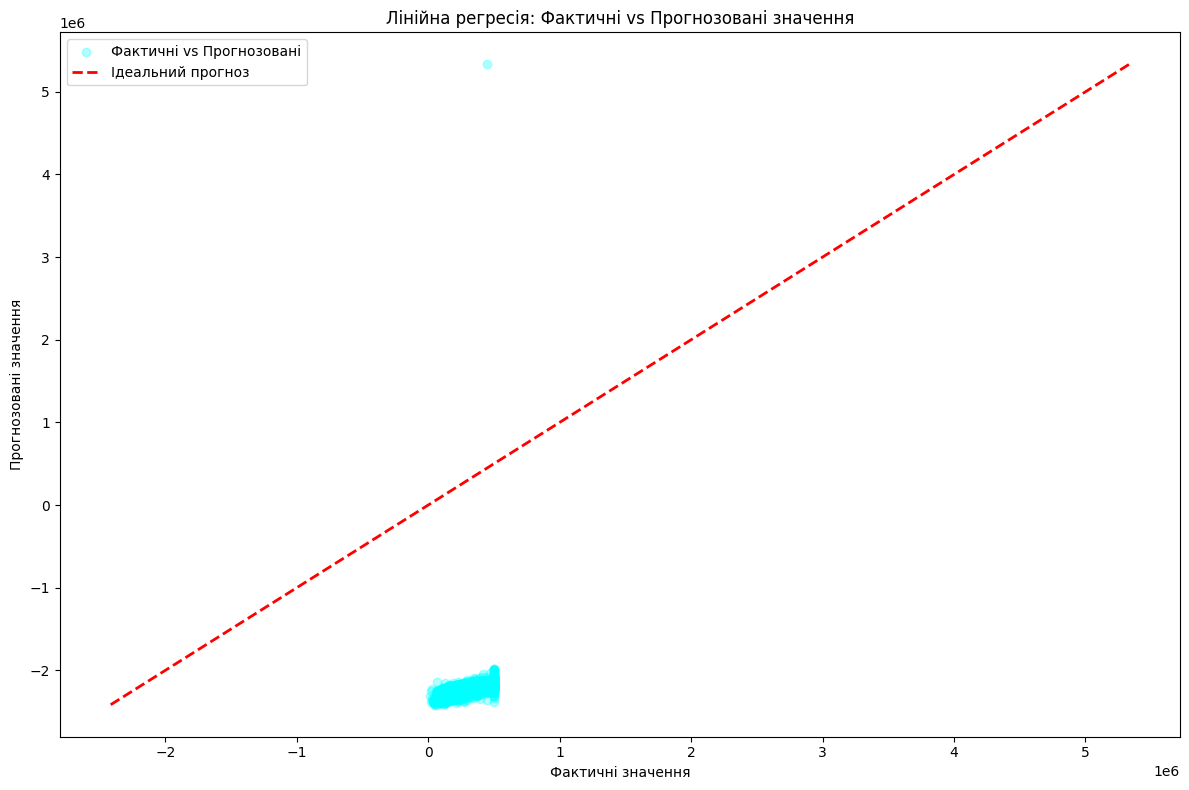

In [31]:
plt.figure(figsize=(12, 8))

plt.scatter(y_test, lr_predicted, color='cyan', alpha=0.3, label='Фактичні vs Прогнозовані')

min_val = min(y_test.min(), lr_predicted.min())
max_val = max(y_test.max(), lr_predicted.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Ідеальний прогноз')

plt.xlabel('Фактичні значення')
plt.ylabel('Прогнозовані значення')
plt.title('Лінійна регресія: Фактичні vs Прогнозовані значення')
plt.legend()
plt.legend()
plt.tight_layout()
plt.show()

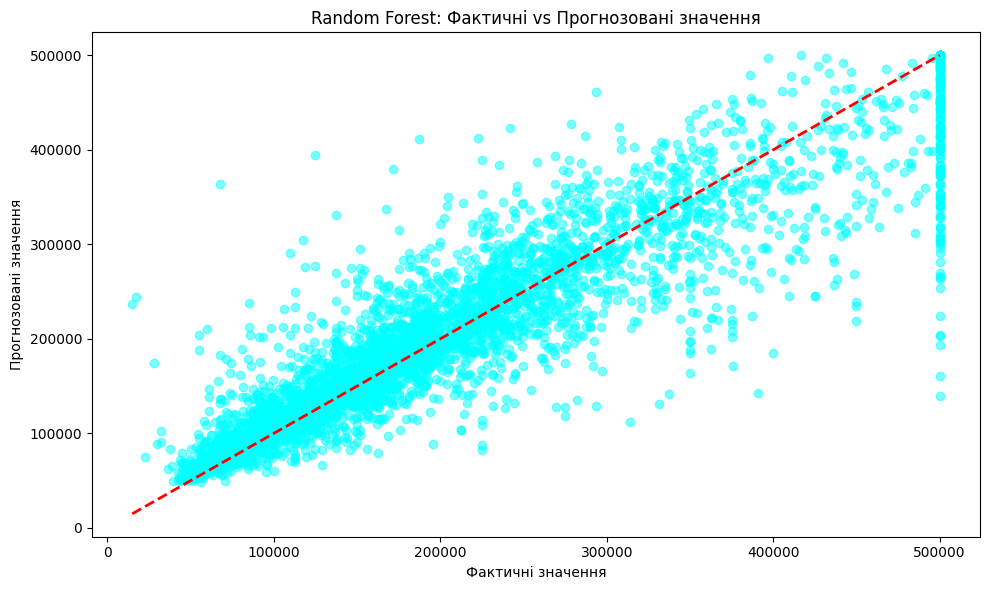

In [33]:
y_pred = rf_grid.best_estimator_.predict(X_test_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='cyan')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Фактичні значення')
plt.ylabel('Прогнозовані значення')
plt.title('Random Forest: Фактичні vs Прогнозовані значення')

plt.tight_layout()
plt.show()

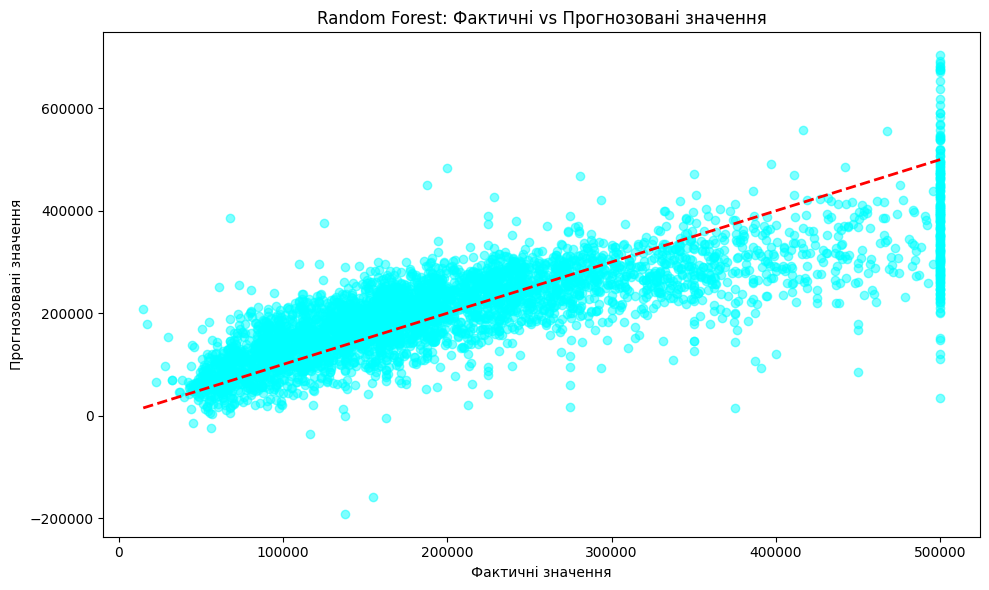

In [34]:
y_pred_ridge = ridge_grid.best_estimator_.predict(X_test_scaled)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, color='cyan', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Фактичні значення')
plt.ylabel('Прогнозовані значення')
plt.title('Random Forest: Фактичні vs Прогнозовані значення')

plt.tight_layout()
plt.show()

## 6. Вивести справжні і прогнозовані значення

In [35]:
print('Справжні значення: ', y_test)

Справжні значення:  20046     47700.0
3024      45800.0
15663    500001.0
20484    218600.0
9814     278000.0
           ...   
15362    263300.0
16623    266800.0
18086    500001.0
2144      72300.0
3665     151500.0
Name: median_house_value, Length: 4128, dtype: float64


In [40]:
print('Прогнозовані значення лінійної моделі:\n', lr_predicted ,'\n')

print('Прогнозовані значення RandomForest:\n', rf_predicted,'\n')

print('Прогнозовані значення Ridge:\n', ridge_predicted,'\n')

Прогнозовані значення лінійної моделі:
 [-2371883.84507083 -2336817.43398843 -2256990.55874422 ...
 -2101470.45988174 -2346467.73377081 -2232308.21164955] 

Прогнозовані значення RandomForest:
 [ 53769.3903548   69496.02132756 469268.42666667 ... 496788.96
  70582.37791178 174509.97331148] 

Прогнозовані значення Ridge:
 [ 64426.14308849 134295.92771043 266689.47384069 ... 438943.30162836
 120924.39801498 183475.43200083] 



### Висновки:

### Було підготовлено та досліджено датасет California Housing Dataset. Три моделі показали занадто високі значення MSE, що свідчить про необхідність пошуку більш підходящої моделі для цієї задачі. Також було проведено тестування за допомогою GridSearchCV.